In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
data= pd.read_csv("C:\\Users\\91971\\green_tech_data.csv")

In [11]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


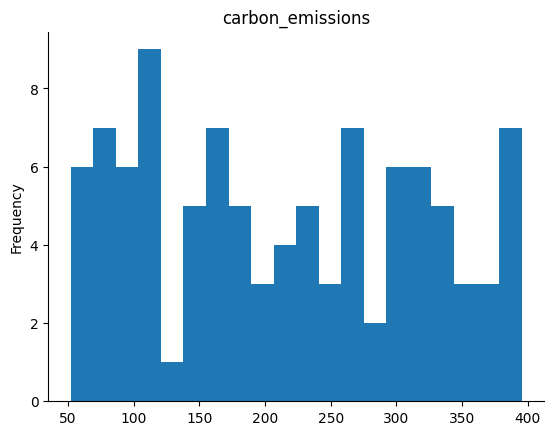

In [12]:
from matplotlib import pyplot as plt
data['carbon_emissions'].plot(kind='hist', bins=20, title='carbon_emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

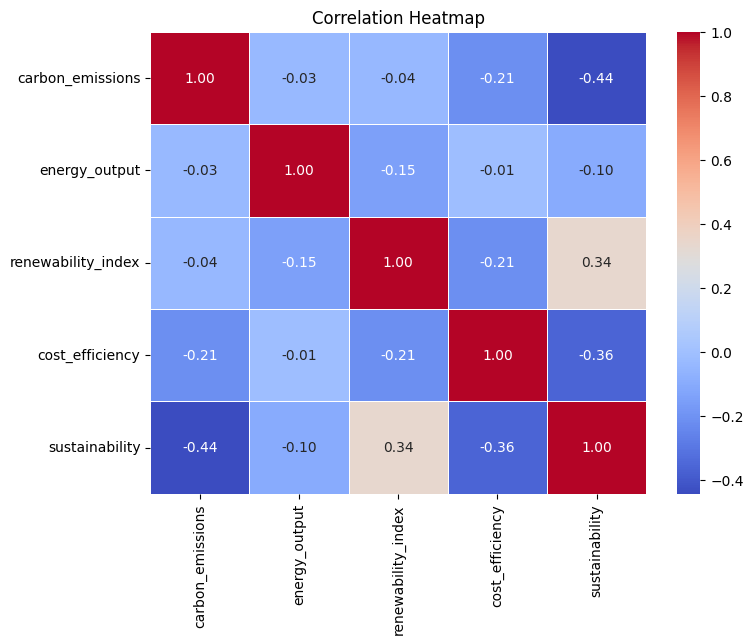

In [13]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [16]:
# Define the target variable (y) and independent variables (X)
X = data.drop(columns=['sustainability'])  # Replace 'sustainability' with your target variable name if different
y = data['sustainability']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a logistic regression model
model = LogisticRegression()

In [19]:
# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


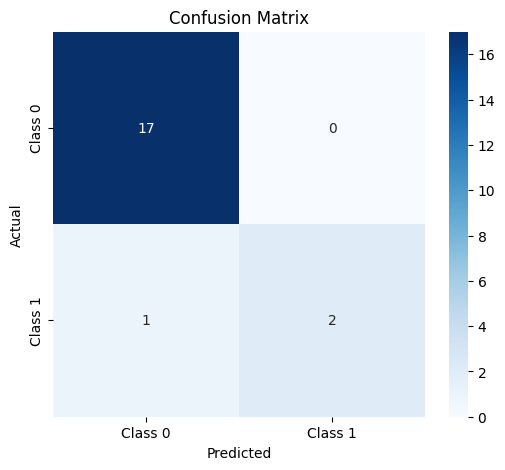

In [23]:
# Draw confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.95

Confusion Matrix:
 [[17  0]
 [ 1  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [24]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])

print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [25]:
import joblib

#Save the model to a file

joblib.dump(model, 'lrmodel_sustainable.pkl')


['lrmodel_sustainable.pkl']